<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**MAMALLACTA GREFA, NAYELI GLADYS**

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [1]:
# Escriba aquí su código para el ejercicio 1
import Bio
from Bio.Seq import Seq
# cargar biopython a sus módulos, funciones
from Bio import Entrez
import re
# Always tell NCBI who are (edit the e-mail below!)
Entrez.email = "nayeli.mamallacta@est.ikiam.edu.ec"
handle = Entrez.esearch(db = "pubmed",
                        term = "Ecuador genomics[Title/Abstract]",
                        usehistory = "y")
record = Entrez.read(handle)
# generate a Python list with all Pubmed IDs of articles about Dengue Network
id_list = record["IdList"]
print(record["Count"])
webenv = record["WebEnv"]
query_key = record["QueryKey"]
handle = Entrez.efetch(db = "pubmed",
                      rettype = "medline",
                      retmode = "text",
                      retstart = 0,
retmax = 51410, webenv = webenv, query_key = query_key)
handle.read()

55


'\nPMID- 35120121\nOWN - NLM\nSTAT- MEDLINE\nDCOM- 20220224\nLR  - 20220224\nIS  - 1553-7404 (Electronic)\nIS  - 1553-7390 (Linking)\nVI  - 18\nIP  - 2\nDP  - 2022 Feb\nTI  - Population genomics and geographic dispersal in Chagas disease vectors: Landscape\n      drivers and evidence of possible adaptation to the domestic setting.\nPG  - e1010019\nLID - 10.1371/journal.pgen.1010019 [doi]\nAB  - Accurate prediction of vectors dispersal, as well as identification of\n      adaptations that allow blood-feeding vectors to thrive in built environments, are\n      a basis for effective disease control. Here we adopted a landscape genomics\n      approach to assay gene flow, possible local adaptation, and drivers of population\n      structure in Rhodnius ecuadoriensis, an important vector of Chagas disease. We\n      used a reduced-representation sequencing technique (2b-RADseq) to obtain 2,552\n      SNP markers across 272 R. ecuadoriensis samples from 25 collection sites in\n      southern


## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [2]:
# Escriba aquí su código para el ejercicio 2
## 'El número de árticulos es:'
handle = Entrez.esearch(db="pubmed", 
                        term="Ecuador genomics[Title/Abstract]",
                        usehistory="y",
                        retmax = 1)
record = Entrez.read(handle)
print("{} Ecuador genomics Title/Abstract found". format(record["Count"]))

## 'El PMID del primer artículo es:'
from Bio import SeqIO
from Bio import Entrez
Entrez.email = "nayeli.mamallacta@est.ikiam.edu.ec"
with Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id="DQ991794.1") as handle:
    seq_record = SeqIO.read(handle, "gb")
print(seq_record.id)


55 Ecuador genomics Title/Abstract found
DQ991794.1


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [3]:
# Escriba aquí su código para el ejercicio 3
import pandas as pd
Ecuadorgen = {'pub_year':[2009, 2019, 2019, 2020, 2020, 2017, 2019, 2020, 2020, 2016, 2014, 2014],
             'pub_authors':['González-Andrade, F', 'Reichardt, Juergen K V', 'Zambrano-Mila, Marlon S', 'Cao, Mengji', 'Brenière, Simone Frédérique', 'Trueba, Gabriel', ' Flores, Francisco J', 'Armijos-Jaramillo, Vinicio', 'Nadeau, Nicola J', 'Andrade, Jacinto', ' Whittle, M R','Garred, Peter'],
             'countries':['Ecuador', 'Australia', 'Ecuador', 'China', 'France', 'Ecuador', 'Ecuador', 'Ecuador', 'United Kingdom', 'Ecuador', 'Brazil', 'Denmark'],
             }
df = pd.DataFrame(Ecuadorgen)
df

,pub_year,pub_authors,countries
0,2009,"González-Andrade, F",Ecuador
1,2019,"Reichardt, Juergen K V",Australia
2,2019,"Zambrano-Mila, Marlon S",Ecuador
3,2020,"Cao, Mengji",China
4,2020,"Brenière, Simone Frédérique",France
5,2017,"Trueba, Gabriel",Ecuador
6,2019,"Flores, Francisco J",Ecuador
7,2020,"Armijos-Jaramillo, Vinicio",Ecuador
8,2020,"Nadeau, Nicola J",United Kingdom
9,2016,"Andrade, Jacinto",Ecuador


In [6]:
pub_year = [2009, 2019, 2019, 2020, 2020, 2017, 2019, 2020, 2020, 2016, 2014, 2014]
pub_authors = ['González-Andrade, F', 'Reichardt, Juergen K V', 'Zambrano-Mila, Marlon S', 'Cao, Mengji', 'Brenière, Simone Frédérique', 'Trueba, Gabriel', ' Flores, Francisco J', 'Armijos-Jaramillo, Vinicio', 'Nadeau, Nicola J', 'Andrade, Jacinto', ' Whittle, M R','Garred, Peter']
countries = ['Ecuador',  'Australia', 'Ecuador', 'China', 'France', 'Ecuador', 'Ecuador', 'Ecuador', 'United Kingdom', 'Ecuador', 'Brazil', 'Denmark']
             
df = pd.DataFrame(pub_year)
print(df.head(2))
print(df.tail(2))
           
df = pd.DataFrame(pub_authors)
print(df.head(2))
print(df.tail(2))

df = pd.DataFrame(countries)
print(df.head(2))
print(df.tail(2))



      0
0  2009
1  2019
       0
10  2014
11  2014
                        0
0     González-Andrade, F
1  Reichardt, Juergen K V
                0
10   Whittle, M R
11  Garred, Peter
           0
0    Ecuador
1  Australia
          0
10   Brazil
11  Denmark


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


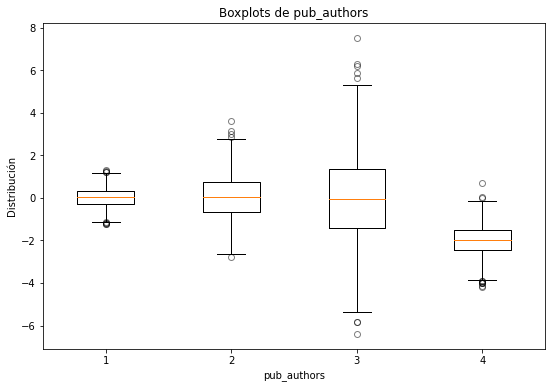

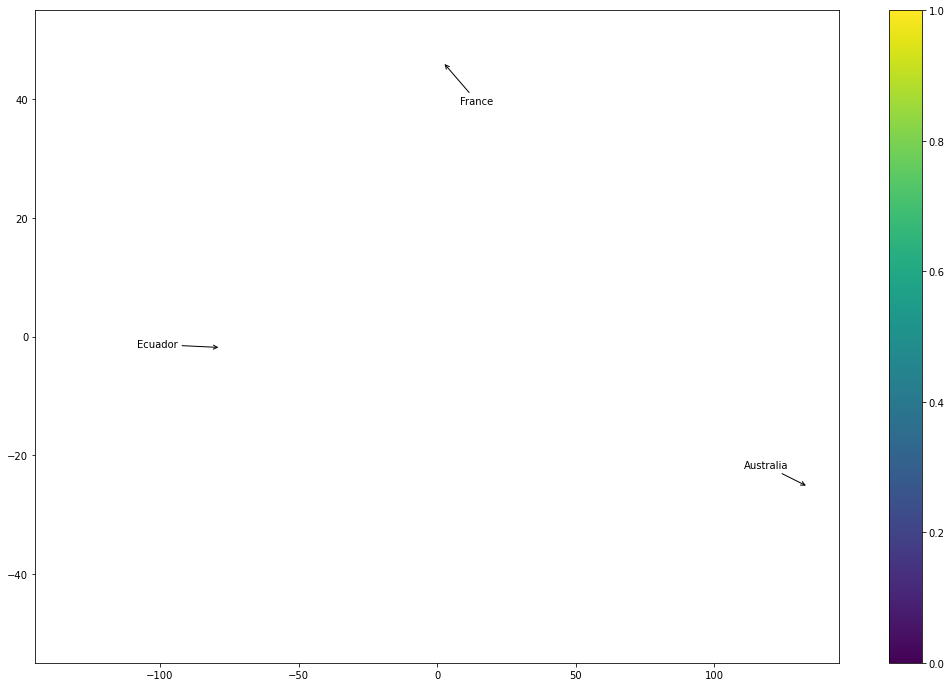

In [7]:
# Escriba aquí su código para el ejercicio 4
import numpy as np
import matplotlib.pyplot as plt
pub_authors1 = np.random.normal(0, np.sqrt(0.2), 1000)
pub_authors2 = np.random.normal(0, np.sqrt(1.0), 1000)
pub_authors3 = np.random.normal(0, np.sqrt(5.0), 1000)
pub_authors4 = np.random.normal(-2, np.sqrt(0.5), 1000)

data = [pub_authors1, pub_authors2, pub_authors3, pub_authors4]
fig = plt.figure(1, figsize=(9, 6))  
ax = fig.add_subplot(111)
bp = ax.boxplot(data)
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
plt.xlabel('pub_authors')
plt.ylabel('Distribución')
plt.title('Boxplots de pub_authors')
plt.show()

import matplotlib.pyplot as plt
zip_country = []
zip_long = []
zip_lat = []
zip_count = []
%matplotlib inline
plt.scatter(zip_long, zip_lat, s = zip_count, c= zip_count)
plt.colorbar()

plt.xlim(-145,145)
plt.ylim(-55,55)

ard = dict(arrowstyle="->")
plt.annotate('Ecuador', xy = (-78.183406, -1.831239), 
               xytext = (-108.183406, -1.831239), arrowprops = ard)
plt.annotate('France', xy = (2.213749, 46.227638),
             xytext =  (8.213749, 39.227638), arrowprops= ard)
plt.annotate('Australia', xy = (133.775136, -25.274398), 
               xytext = (110.775136, -22.274398), arrowprops= ard)
               
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show()




## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**


### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

MW244756.1 Cruziohyla calcarifer cruzioseptin-17 precursor, m...
Sequence length 196, 5 features, from: Cruziohyla calcarifer (splendid leaf frog)
MW244755.1 Cruziohyla calcarifer cruzioseptin-16 precursor, m...
Sequence length 328, 5 features, from: Cruziohyla calcarifer (splendid leaf frog)
KX065077.1 Cruziohyla calcarifer proteinase inhibitor precurs...
Sequence length 418, 5 features, from: Cruziohyla calcarifer (splendid leaf frog)
KX065076.1 Cruziohyla calcarifer proteinase inhibitor precurs...
Sequence length 442, 5 features, from: Cruziohyla calcarifer (splendid leaf frog)
KX065075.1 Cruziohyla calcarifer proteinase inhibitor precurs...
Sequence length 466, 5 features, from: Cruziohyla calcarifer (splendid leaf frog)
KX065074.1 Cruziohyla calcarifer proteinase inhibitor precurs...
Sequence length 445, 5 features, from: Cruziohyla calcarifer (splendid leaf frog)
KX065073.1 Cruziohyla calcarifer proteinase inhibitor precurs...
Sequence length 450, 5 features, from: Cruziohyla cal

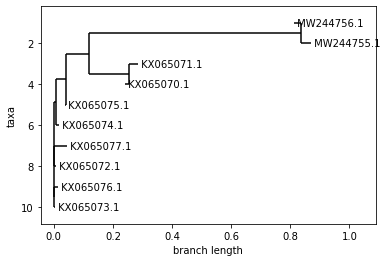

In [8]:
# Escriba aquí su código para el ejercicio 6
from Bio import Entrez 
from Bio import SeqIO
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline
import os

id_list = ["MW244756.1,MW244755.1,KX065077.1,KX065076.1,KX065075.1,KX065074.1,KX065073.1,KX065072.1,KX065071.1,KX065070.1"]
Entrez.email = "nayeli.mamallacta@est.ikiam.edu.ec"
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= id_list
                  ) as handle:
    for seq_record in SeqIO.parse(handle, "gb"):
        print("%s %s..." %(seq_record.id, seq_record.description[:50]))
        print( "Sequence length %i, %i features, from: %s" % (len(seq_record), 
                                                              len(seq_record.features), 
                                                              seq_record.annotations["source"],))

        
clustalw_exe =r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "data\Cruziohyla calcarifer.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)
        
ClustalAlign = AlignIO.read("data\Cruziohyla calcarifer.aln", "clustal")
print(ClustalAlign)    


from Bio import Phylo
tree = Phylo.read("data\Cruziohyla calcarifer.dnd", "newick")
Phylo.draw_ascii(tree)
print(tree)

tree.rooted = True
Phylo.draw(tree)

**Escriba aquí la interpretación del árbol**

Como se puede evidenciar en la imagen el árbol filogenético parte desde un ancestro común de la cual se subdividien en algunas ramificaciones donde estas ramificaciones presentan un proceso de diferenciación y especiación que da origen a distintos organismos. También se puede visualizar que existen organismos que están dentro de una misma rama, eso quiere decir que están emparentados filogenéticamente.


## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```

https://github.com/NayeliMG/GBI6_ExamenPython